# Pymaceuticals Inc.
---

### Analysis

Analysis Report: 

Summary Statistics: After cleaning up the data and removing any duplicates we look at how the different regimens affected the tumor sizes.  We can see in the dataframe created that the drug Ramicane had the lowest average in tumor size and Ketapril had the highest average in tumor size.  In comparsion to the perferred drug Capomulin, the drug Ramicane had a slightly greater affect in decreasing the tumor size (the results were very close).

Bar and Pie Charts: The bar charts show us how many time a drug regimen was adminstered to the mice. Since Capomulin was the drug of intrest it was administered the most. The pie charts showed the total number to male mice to female mice used during the the 45 days. 

Lines and Scatter Plots: The line graph shows what size the tumor was at each timepoint. I observed mouse l509 who was given Capomulin and we can see from the graph that mouse l509's tumor grew from the first day to until day 20.  At day 20 the tumor size dropped and from here until day 45 the tumor continued to decrease in size with a few times where it did grow slightly but then dropped again. The scatter plot shows how the tumor size and weight may be related to each other when the mice is administered Capomulin.  I observed the affect that the mice weight may decrease when the tumor size decrease.       

Correlation and Regression: This graphs show the correclation and regression how th weight of the mice and tumor size. As stated above the weight decreased when the tumor size decreased. This is greater supported when I applied the regression line and found the correclation to be 0.84. This lets us know that there is great correlation. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study_results = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
complete_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = len(complete_study_results['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Source 1 used here
duplicate_study_results = complete_study_results.loc[complete_study_results.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_study_results = duplicate_study_results['Mouse ID'].unique()
duplicate_study_results 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = complete_study_results.loc[complete_study_results['Mouse ID'] == 'g989']
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_study_results = complete_study_results.loc[complete_study_results['Mouse ID'] != 'g989']
final_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(final_study_results['Mouse ID'].unique())
clean_mice_count

248

## Summary Statistics

In [7]:
final_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Source 2 used here
tumor_mean = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_standard_deviation = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_regimen_summary = pd.DataFrame({'Mean Tumor Volume':tumor_mean,
                                    'Median Tumor Volume':tumor_median,
                                    'Tumor Volume Variance':tumor_variance,
                                    'Tumor Volume Std. Dev.':tumor_standard_deviation,
                                    'Tumor Volume Std. Err.':tumor_sem})


drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Source 3 used here
drug_regimen2 = final_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#Find out how many drug regimens used
regimen = final_study_results['Drug Regimen'].value_counts() 
regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

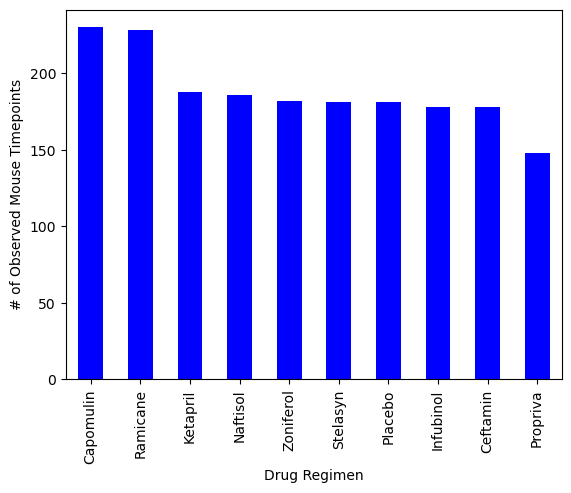

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = regimen.plot(kind='bar', facecolor='blue', 
                          xlabel='Drug Regimen', 
                          ylabel='# of Observed Mouse Timepoints')

plt.show()

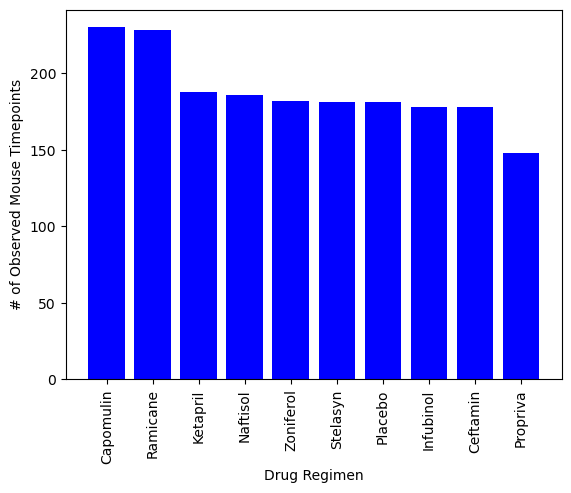

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen))
drug = regimen.index.values
plt.bar(x_axis, regimen, color="blue", align="center")
plt.xticks(x_axis, drug, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [13]:
#Find out how mice are female and male
mice_sex = final_study_results['Sex'].value_counts() 
mice_sex_total = final_study_results['Mouse ID'].count()
mice_sex_total
mice_sex_percent = mice_sex / mice_sex_total * 100
mice_sex_percent

Male      50.957447
Female    49.042553
Name: Sex, dtype: float64

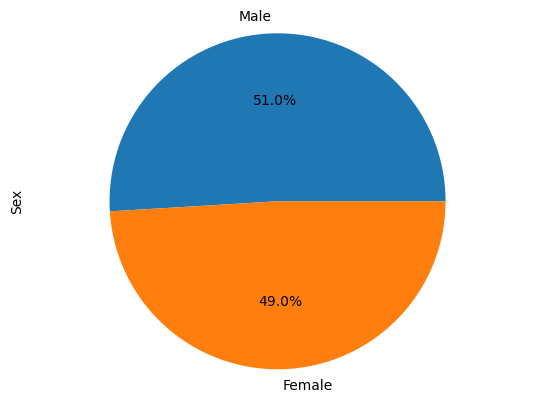

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = mice_sex.plot(kind='pie', y='Sex', autopct="%1.1f%%")
pandas_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

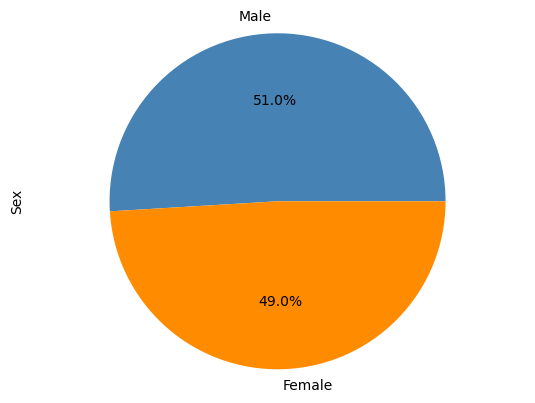

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
mice_amount = [50.957447, 49.042553]
colors = ["steelblue","darkorange"]
plt.pie(mice_amount, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.axis("equal")
plt.show() 

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Source 4 used here
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
new_regimens = final_study_results[final_study_results['Drug Regimen'].isin(four_regimens)]
new_regimens
final_regimens = new_regimens.groupby('Mouse ID')['Timepoint'].max()
final_regimens

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_results = pd.merge(final_study_results, final_regimens, on=('Mouse ID', 'Timepoint'), how='right')
new_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

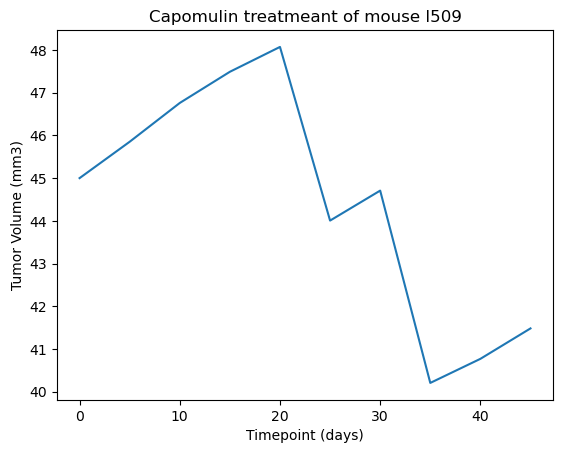

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = final_study_results.loc[final_study_results['Mouse ID'] == 'l509']
x_value = capomulin_mouse['Timepoint']
y_value = capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_value, y_value)
plt.title("Capomulin treatmeant of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

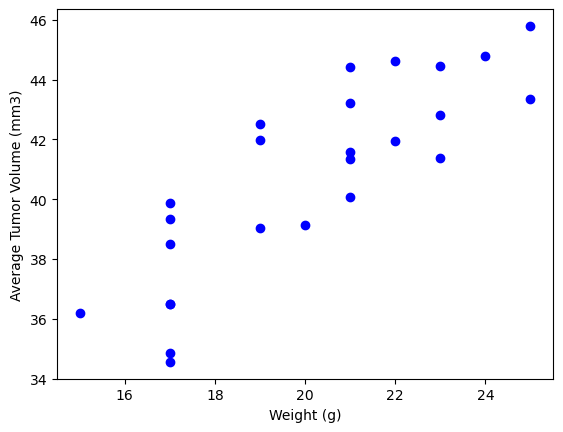

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = final_study_results.loc[final_study_results['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin.groupby(['Mouse ID']).mean(numeric_only=True)
x_value = capomulin_avg['Weight (g)']
y_value = capomulin_avg['Tumor Volume (mm3)']
plt.scatter(x_value, y_value, marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


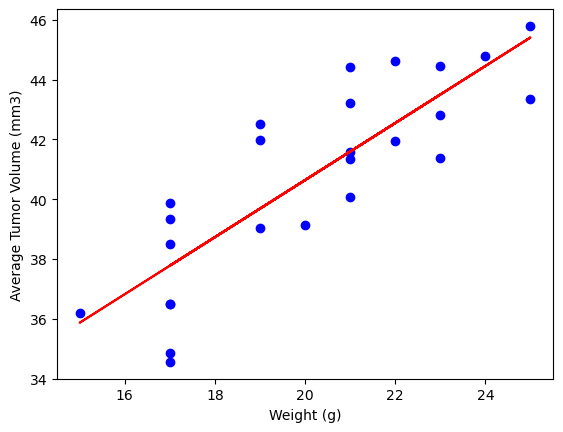

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value = capomulin_avg['Weight (g)']
y_value = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="o", facecolors="blue")
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_value,y_value)[0],2)}.")  
plt.show()

In [ ]:
t